# Clustering ML Models with Python

by Emil Vassev

October 16-19, 2022
<br><br>
Copyright (C) 2022 - All rights reserved, do not copy or distribute without permission of the author.
***

## Definitions

**Cluster**
* a group of similar entities positioned or occurring closely together
* a collection of objects on the basis of similarity and dissimilarity between them

**The role of ML**
* usually, all points in a cluster depict similar characteristics ML could be used to identify traits and segregate clusters

**Clustering**
* dividing data points into multiple clusters of similar values
    * the objective is to segregate groups with similar traits and bundle them together into different clusters
* a type of unsupervised learning method - we draw references from datasets consisting of input data without labeled responses
    * determines the intrinsic grouping among the unlabeled data

## Types of Clustering Models

**Connectivity Models** - classify data points based on their closeness, i e based on the
notion that the data points closer to each other depict more similar characteristics
compared to those placed farther away

**Distribution Models** - based on the probability of all data points in a cluster belonging to
the same distribution, i e Normal distribution or Gaussian distribution

**Density Models** - search the data space for densities of data points and isolate the different
density regions by assigning the data points within the same region as clusters

**Centroid Models** - similarity between data points is derived based on their closeness to the
cluster’s centroid

## K-Means Clustering Algorithms

The most popular clustering algorithm

* involves assigning examples to clusters so to minimize the variance within each cluster
* partitions **n** observations into **k** clusters where each observation belongs to the cluster with the nearest mean serving as a prototype of the cluster

Steps
1. Randomly select a number of **n** clusters, each of which is represented by a variable **k**
2. Each cluster is assigned with a centroid (the center of a cluster) the centroids need to be defined far from each other to reduce variation
3. Each data point is assigned to the cluster whose centroid is at the closest distance
4. Iterations - once all data points have been assigned to respective clusters Step 2 and Step 3 are repeated:
    * the centroids are reassigned for each cluster
    * all data points are rearranged based on their distance from the newly defined centroids
    * repeated until the centroids stop moving from their positions

## Example #1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

**Note**: KMeans is uisng numpy and does not work with a numpy version higher than '1.21.4'.

In [2]:
np.__version__

'1.21.4'

### Step #1: Preparing Data

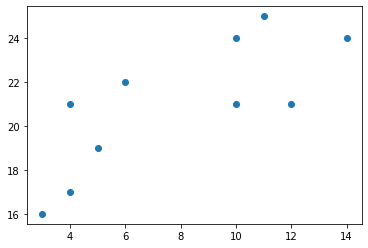

In [3]:
X = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(X, y)
plt.show()

We pack X and y in a list of tuples - it is going to be used by the KMeans algorithm. 

In [4]:
kmeans_data = list(zip(X, y))
kmeans_data                   

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (6, 22),
 (10, 21),
 (12, 21)]

### Step #2: Determining the Optimum Number of Clusters **k**

* We use the Elbow Method.
* KMeans's main hyperparameter is **n_clusters** which is set to the estimated number of clusters in the data.

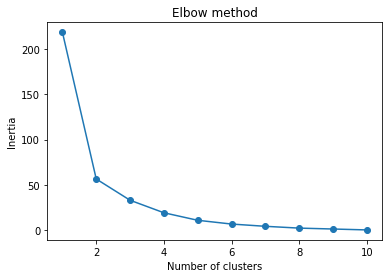

In [5]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The optimum number of clusters is **2**.

**Note**: *The Elbow Method requires our manual decision for the number of clusters.*

**An automatic process for choosing the number of clusters**

Extracted from <a link="https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c" target="new">An Approach for Choosing Number of Clusters for K-Means</a> 
                                        
The suggested approach takes into account the inertia value for each possible *k* and weights it by a penalty parameter. This parameter represents the trade-off between the inertia and the number of clusters. Still, alpha needs to be manually tuned.

Here, we compute a weighted version of the inertia, by using the following formula:

<pre>

                     inertia(k) 
   scaled inertia = ------------ + alpha*k
		             inertia(k=1) 
                                 
</pre>

Here:
* k - number of clusters
* inertia(k) - the inertia (Within Cluster Sum of Squares) of havinf k clusters
* alpha - manually tuned factor that gives penalty to the number of clusters
* inertia(k=1)- inertia for the basic situation in which all data points are in the same cluster

In [6]:
scaled_inertias = []
alpha = 0.2
k = 0

for inertia in inertias:
    k += 1
    scaled_inertia = inertia/inertias[0] + alpha*k
    scaled_inertias.append(scaled_inertia)
    

n_clusters = scaled_inertias.index(min(scaled_inertias)) + 1

n_clusters

2

The optimum number of clusters has been confirmed to be **2**, with **alpha=0.2**.

### Step #3: Computing the K-Means Clustering
* KMeans.fit(X) - compute k-means clustering
* KMeans.predict(X) - predicts the closest cluster each sample in X belongs to
* kmeans.cluster_centers_ - holds the centroids after training 

In [7]:
kmeans = KMeans(n_clusters=2)
pred_cl = kmeans.fit_predict(kmeans_data)

In [8]:
pred_cl

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

* (4, 21) - assigned to cluster "0"
* (5, 19) - assigned to cluster "0"
* (10, 24) - assigned to cluster "1"
* (4, 17) - assigned to cluster "0"
* (3, 16) - assigned to cluster "0"
* (11, 25) - assigned to cluster "1"
* (14, 24) - assigned to cluster "1"
* (6, 22) - assigned to cluster "0"
* (10, 21) - assigned to cluster "1"
* (12, 21) - assigned to cluster "1"

In [9]:
kmeans.cluster_centers_

array([[ 4.4, 19. ],
       [11.4, 23. ]])

### Step #4: Plotting the Clusters

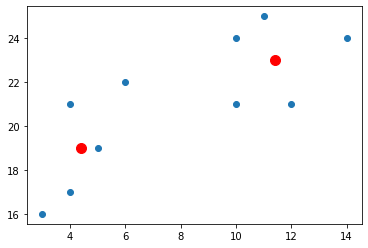

In [10]:
plt.scatter(X, y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

## Example #2

### Step #1: Preparing Data

* **sklearn.datasets.make_blobs** - generates isotropic Gaussian blobs for clustering

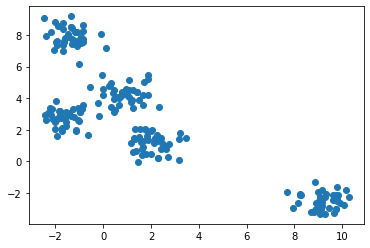

In [11]:
X, y = make_blobs(n_samples=200, centers=5, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

### Step #2: Determining the Optimum Number of Clusters k

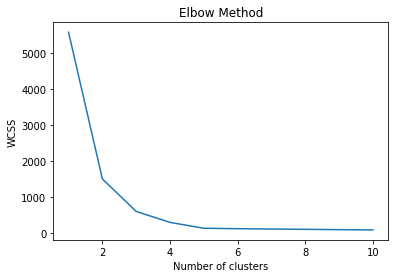

In [12]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within Cluster Sum of Squares
plt.show()

The optimum number of clusters is **5**.

### Step #3: Computing the K-Means Clustering

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

kmeans.cluster_centers_

array([[-1.58063033,  2.76879457],
       [ 2.05479441,  1.15373547],
       [ 9.19806882, -2.50247405],
       [-1.3914031 ,  7.90274995],
       [ 0.87493583,  4.2620895 ]])

### Step #4: Plotting the Clusters

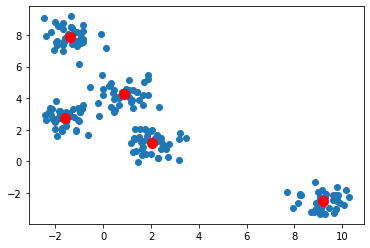

In [14]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

## Example #3

### Step #1: Preparing Data

In [15]:
data = {'X': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = pd.DataFrame(data, columns=['X', 'y'])

### Step #2: Determining the Optimum Number of Clusters k

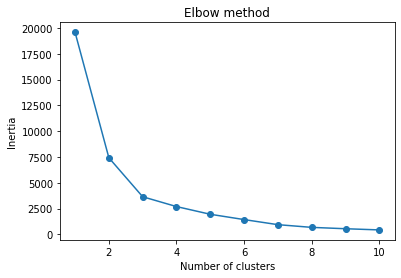

In [16]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

The optimum number of clusters is **3**.

### Step #3: Computing the K-Means Clustering

In [17]:
kmeans = KMeans(n_clusters=3)
pred_cl = kmeans.fit_predict(df)

In [18]:
pred_cl

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
kmeans.cluster_centers_

array([[55.1, 46.1],
       [43.2, 16.7],
       [29.6, 66.8]])

### Step #4: Plotting the Clusters

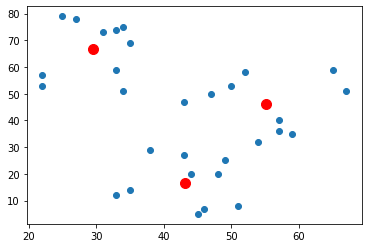

In [20]:
plt.scatter(df['X'], df['y'])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

## Affinity Propagation Clustering Algorithms

The AP ML algorithm is popular due to its simplicity, general applicability, and performance.
* it takes as input measures of similarity between pairs of data points, and simultaneously considers all data
points as potential exemplars
* it creates clusters by sending messages between data points until convergence
* unlike K-Means, AP does not require the number of clusters to be determined or estimated beforerunning the algorithm

Important input parameters - two sets of data:
* **similarities between data points** - represent how well suited a point is to be another one’s exemplar
* **preferences** - represent each data point’s suitability to be an exemplar

Steps - AP runs through a number of iterations, until it converges each iteration has two message passing steps:
* **calculating responsibilities** -  a responsibility **r(i, k)** reflects the accumulated evidence for how well
suited point **k** is to serve as the exemplar for point **i** considering other potential exemplars for point **i**
* **calculating availabilities** - an availability **a(i, k)** reflects the accumulated evidence for how appropriate
it would be for point **i** to choose point **k** as its exemplar, considering the support from other pointswhere point **k** should be an exemplar

In [21]:
from sklearn.cluster import AffinityPropagation
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from itertools import cycle

## Example #4

### Step #1: Preparing Data

**sklearn.datasets.make_classification** - generates a random n-class classification problem by creating clusters of points normally distributed (std=1) about vertices of an **n_informative** dimension.

In [22]:
X, _ = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)

### Step #2: Computing the Affinity Propagation Clustering

* **AffinityPropagation.fit(X)** - fits the clustering from features, or affinity matrix
* **AffinityPropagation.predict(X)** - predict the closest cluster each sample in X belongs to; returns the cluster label for each data point
* **AffinityPropagation.cluster_centers_** - returns the cluster centroids
* **AffinityPropagation.labels_** - returns the cluster label for each data point

In [23]:
# define the model
ap_model = AffinityPropagation(affinity = 'euclidean', random_state=5)
# fit the model
ap_model.fit(X)
# assign a cluster to each example
pred_ap = ap_model.predict(X)

In [24]:
centers = ap_model.cluster_centers_ # center of each cluster
centers

array([[-1.25889003, -0.51230245],
       [-1.95587027, -2.46664394],
       [-0.49128695,  0.1146967 ],
       [ 2.12701291, -0.98641003],
       [-0.50859572, -0.49588523],
       [ 0.13421238, -1.09699413],
       [-1.36591749, -1.66417343],
       [ 0.01249781,  0.50493098],
       [ 1.05581953, -0.786046  ],
       [ 1.27349262, -1.32861704],
       [ 2.57269969, -1.6727673 ],
       [-1.12788082, -1.24092295],
       [-0.77265675, -0.88591789],
       [ 0.63761679, -0.4662074 ]])

In [25]:
# retrieve unique clusters
clusters = unique(pred_ap)
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

Here, we can see for each data point the cluster it has been assigned to.  

In [26]:
pred_ap

array([ 6,  5,  6,  3,  7, 11, 11,  4, 12,  5, 10, 11,  5,  4,  1, 11,  1,
       11, 11,  5,  6, 11, 10,  0,  6,  6,  2, 12,  9,  6,  0,  9, 11, 10,
        4,  8,  0,  5,  9,  7,  9,  3,  8,  1, 12,  4,  5,  0,  6,  1,  1,
        2,  4,  9,  8,  2,  5, 12, 12, 13,  9,  4,  1, 13,  8,  6,  9,  6,
       10,  7, 10,  9, 11,  9,  1,  3, 10,  0,  8,  8,  7,  2,  4, 13,  2,
        5, 10,  6,  1, 12, 13,  3, 11, 13, 12, 13,  3,  2, 13,  6, 12,  8,
        5,  6,  9,  4, 12,  5,  9, 12, 13,  9,  2,  4,  6,  0,  9,  8,  2,
        3,  4,  3, 13,  8, 11, 11,  5,  3,  8,  8,  7,  5, 11,  4, 12,  4,
        5,  3,  1, 12,  6, 11, 10,  9,  7,  6,  1,  4, 11,  5,  4,  0,  5,
        1, 12,  8,  8, 13,  5, 11,  0, 12,  9, 11,  9, 11,  9,  0, 12, 11,
        5,  7,  4, 11,  6,  6,  3,  6,  3,  6,  1,  7,  9, 10, 11,  3,  0,
        4,  2,  8,  6, 12,  0,  4,  8,  0, 13,  0,  0,  9, 11, 11, 12,  4,
        9,  6,  2,  8, 12,  8,  9,  5,  1, 11,  8, 10,  3,  8,  7,  5,  6,
        5, 12,  4,  4,  6

Again, we can see for each data point the cluster it has been assigned to - this time we use **ap_model.labels_**, i.e., the cluster labels after training.

In [27]:
labels = ap_model.labels_ # label to each element
labels

array([ 6,  5,  6,  3,  7, 11, 11,  4, 12,  5, 10, 11,  5,  4,  1, 11,  1,
       11, 11,  5,  6, 11, 10,  0,  6,  6,  2, 12,  9,  6,  0,  9, 11, 10,
        4,  8,  0,  5,  9,  7,  9,  3,  8,  1, 12,  4,  5,  0,  6,  1,  1,
        2,  4,  9,  8,  2,  5, 12, 12, 13,  9,  4,  1, 13,  8,  6,  9,  6,
       10,  7, 10,  9, 11,  9,  1,  3, 10,  0,  8,  8,  7,  2,  4, 13,  2,
        5, 10,  6,  1, 12, 13,  3, 11, 13, 12, 13,  3,  2, 13,  6, 12,  8,
        5,  6,  9,  4, 12,  5,  9, 12, 13,  9,  2,  4,  6,  0,  9,  8,  2,
        3,  4,  3, 13,  8, 11, 11,  5,  3,  8,  8,  7,  5, 11,  4, 12,  4,
        5,  3,  1, 12,  6, 11, 10,  9,  7,  6,  1,  4, 11,  5,  4,  0,  5,
        1, 12,  8,  8, 13,  5, 11,  0, 12,  9, 11,  9, 11,  9,  0, 12, 11,
        5,  7,  4, 11,  6,  6,  3,  6,  3,  6,  1,  7,  9, 10, 11,  3,  0,
        4,  2,  8,  6, 12,  0,  4,  8,  0, 13,  0,  0,  9, 11, 11, 12,  4,
        9,  6,  2,  8, 12,  8,  9,  5,  1, 11,  8, 10,  3,  8,  7,  5,  6,
        5, 12,  4,  4,  6

### Step #3: Plotting the Clusters

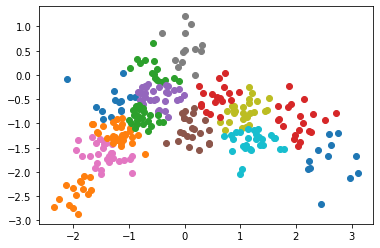

In [28]:
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(pred_ap == cluster)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])

# show the plot
plt.show()

## Example #5

### Step #1: Preparing Data

In [29]:
# generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, -1]]
X, _ = make_blobs(n_samples = 300, centers = centers,
                  cluster_std = 0.5, random_state = 0)

### Step #2: Computing the Affinity Propagation Clustering

In [30]:
# cpute Affinity Propagation
ap_model = AffinityPropagation(affinity = 'euclidean', random_state=5)
ap_model.fit(X)

AffinityPropagation(random_state=5)

In [31]:
centers = ap_model.cluster_centers_ # center of each cluster
centers

array([[ 0.80238551, -1.57971026],
       [ 1.41079286, -0.99735368],
       [ 1.4322181 ,  0.62891749],
       [-1.77039851, -0.968369  ],
       [ 0.81765323, -0.92164807],
       [-1.34602492, -0.23181147],
       [ 1.08333675,  1.31751572],
       [-0.72834405, -0.78047852],
       [-1.31871851, -1.19863591],
       [ 0.74459743,  0.40968391],
       [ 1.76638961,  1.73467938],
       [-0.90246515, -1.89078143],
       [ 0.00562834, -1.02229771],
       [ 0.41742508,  1.45041324]])

In [32]:
n_clusters = len(centers)
n_clusters

14

In [33]:
cluster_centers_indices = ap_model.cluster_centers_indices_
labels = ap_model.labels_

### Step #3: Plotting the Clusters

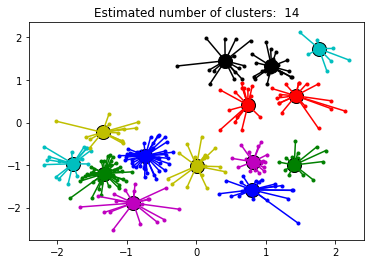

In [34]:
from itertools import cycle
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
  
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor = col, markeredgecolor ='k',
             markersize = 14)
  
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], 
                 [cluster_center[1], x[1]], col)
  
plt.title('Estimated number of clusters: % d' % n_clusters)
plt.show()